# **Enron Network Analysis**

In this case study, we will go through and understand the **employee network in Enron** using a subset of the Enron dataset.

--------------------
## **Context**
--------------------

The story of **Enron** is a story of a **company that reached immense heights to deepest lows in no time**. Enron Corp. was one of the biggest firms in the United States and was delivering splendid performance on wall street. However, **the company witnessed a sudden drop in prices and declared bankruptcy**. How one of the most powerful businesses in the US, and the world, disintegrated overnight is still a puzzle to many.

**The Enron leadership was involved in one of the biggest frauds** and this particular fraud has been an area of interest for many researchers and ML practitioners.

In this case study, we have **a subset of 50 senior officials**. The idea is to **build a network from the emails, sent and received by those senior officials, to better understand the connections and highlight the important nodes in this group.**

------------------
## **Steps**
------------------

- Read the data and understand the structure of the data.
- Put the data into a graph.
- Identify important nodes from the visualization.
- Calculate the centrality measures and quantify the importance. 
- Highlight the important nodes through color coding and comment on the roles / importance that can be figured out from this.

------------------------
## **References**
------------------------
- Dataset - https://www.cs.cmu.edu/~./enron/

## **Import the files**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from decorator import decorator
import networkx as nx
from networkx.utils import create_random_state, create_py_random_state
import numpy as np
import seaborn as sns
from pprint import pprint

%matplotlib inline


# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.4f}'.format  
pd.set_option('display.max_colwidth', None)

# Update default background style of plots
sns.set_style(style = 'darkgrid')

# Options for the nodes
format_nodes = {
    "linewidths": 0.5,
    "width": 0.1,
    "font_size": 8,
}

## Loading the data

In [2]:
data = pd.read_csv('data/EmailEnron.csv')

In [3]:
data.shape

(304, 2)

In [4]:
data.describe()

,From,To
count,304.0000,304.0000
mean,35.6711,35.6711
std,29.0412,29.0412
min,0.0000,0.0000
25%,4.0000,4.0000
50%,39.0000,39.0000
75%,57.2500,57.2500
max,79.0000,79.0000


In [5]:
data.head()

,From,To
0,0,1
1,1,0
2,1,2
3,1,3
4,1,4


## Generating Graphs

### **Note:** In case you face an error while running the below code, please upgrade the decorator library, by running the following code, to resolve the error.

**!pip install --upgrade decorator**

In [6]:
G = nx.Graph()

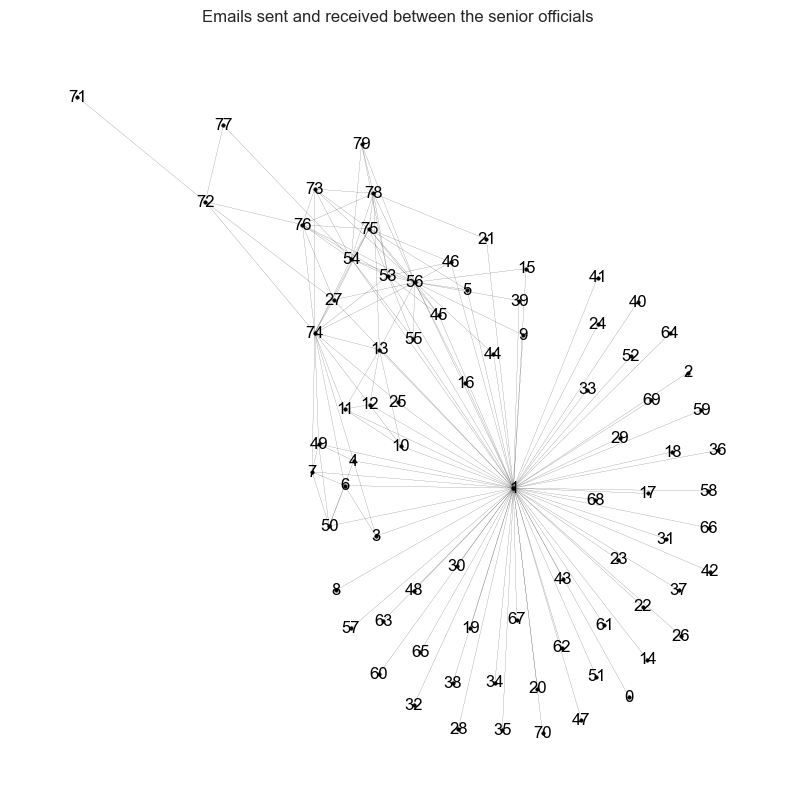

In [7]:
G = nx.from_pandas_edgelist(data, 'From', 'To')

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
options = {
    "node_color": "black",
    "node_size": 6,
    "linewidths": 0.5,
    "width": 0.1,
}
nx.draw(G, with_labels=True, **options, ax=ax)
plt.title('Emails sent and received between the senior officials')
plt.show()

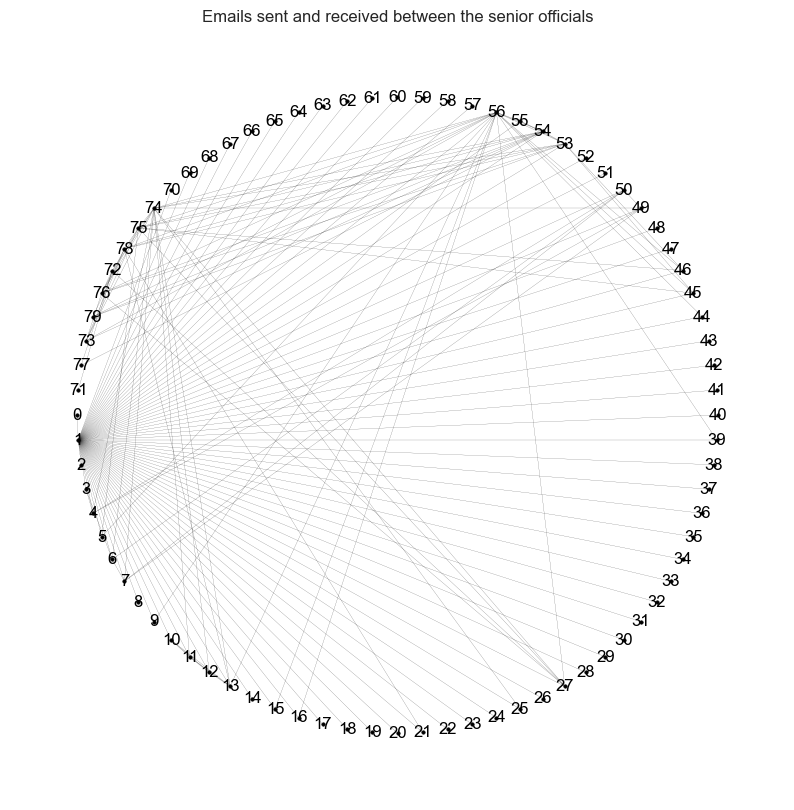

In [8]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
nx.draw_shell(G, with_labels=True, **options, ax=ax)
plt.title('Emails sent and received between the senior officials')
plt.show()

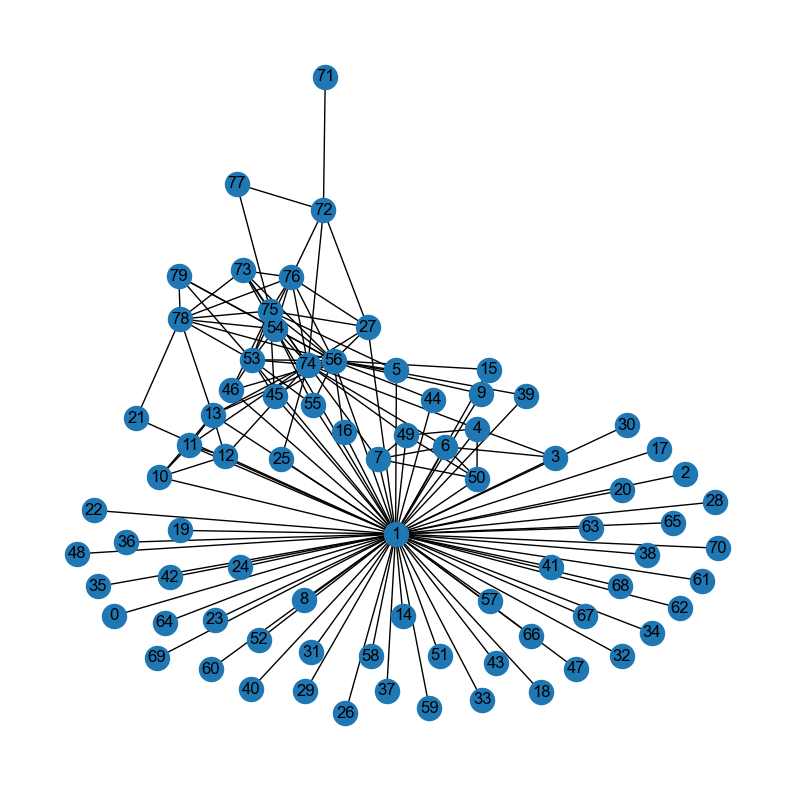

In [9]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

# With the default parameters
nx.draw_spring(G, with_labels=True, ax=ax)

**Observations:**

- Out of the 80 nodes in the dataset, 1 appears to be the most important node as it is connected with all the other nodes. We can interpret this official, perhaps as the CEO.
- Other important nodes are also highlighted in the visualization - 56, 54, 74, 53, 50. The circular visualization is a better visualization approach to highlight the important nodes.
- There are internal team structures that appear from the visualization but are not very clear as to which nodes are part of which teams.

In [10]:
# Let us quickly look at the degree of the nodes
# for i in G.degree(): print(i)
# print(G.degree())
def sort_measure(cc):
    "Return the dictionary cc ordered highest to lowest value."
    return dict(sorted(cc.items(), key=lambda x: x[1], reverse=True))

d = sort_measure(dict(G.degree())) 
print(d)

{1: 70, 56: 20, 74: 16, 53: 11, 54: 11, 75: 11, 78: 9, 76: 9, 13: 7, 27: 6, 73: 6, 4: 5, 6: 5, 7: 5, 11: 5, 12: 5, 49: 5, 50: 5, 72: 5, 10: 4, 45: 4, 46: 4, 55: 4, 79: 4, 3: 3, 5: 3, 9: 2, 15: 2, 16: 2, 21: 2, 25: 2, 39: 2, 44: 2, 77: 2, 0: 1, 2: 1, 8: 1, 14: 1, 17: 1, 18: 1, 19: 1, 20: 1, 22: 1, 23: 1, 24: 1, 26: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 40: 1, 41: 1, 42: 1, 43: 1, 47: 1, 48: 1, 51: 1, 52: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1}


## **Centrality Measures**

In [11]:
deg_cen = nx.degree_centrality(G)      # Degree centrality: most popular person

eig_cen = nx.eigenvector_centrality(G) # Eigenvector centrality: most popular person that is 
                                       # friends with popular people

clo_cen = nx.closeness_centrality(G)   # Closeness centrality: person that could best inform group
    
bet_cen = nx.betweenness_centrality(G) # Betweenness centrality: person whose removal could 
                                       # best break the network apart

In [12]:
top = 5
title = ['Degree Centrality', 'Eigenvector Centrality',
                       'Closeness Centrality', 'Betweenness Centrality']
for i, cc in enumerate([deg_cen, eig_cen, clo_cen, bet_cen]):
    d = sort_measure(cc)
    print(f'Sorted Importance of nodes in terms of {title[i]}: ', list(d.keys())[:top])

Sorted Importance of nodes in terms of Degree Centrality:  [1, 56, 74, 53, 54]
Sorted Importance of nodes in terms of Eigenvector Centrality:  [1, 56, 74, 53, 54]
Sorted Importance of nodes in terms of Closeness Centrality:  [1, 56, 53, 54, 27]
Sorted Importance of nodes in terms of Betweenness Centrality:  [1, 56, 54, 27, 74]


### **Reviewing details for each measured centrality: Degree, Eigenvector, Closeness, Betweenness**

In [13]:
def centrality_measure_details(cc, title, top=5):
    """Return the top 5 nodes in the centrality measure cc and plot the network.
    cc: centrality measure.
    title: title of plot.
    top: top nodes to highlight."""
    
    top = 5
    d = sort_measure(cc)
    print(f'Sorted Importance of nodes in terms of {title}: ', list(d.keys())[:top])
    
    # Let us color these nodes and visualize the network again
    color = ['red' if node in list(d.keys())[:top] else 'black' for node in G]
    plt.figure(figsize = (10, 10))
    ax=plt.subplot(111)
    nx.draw(G, node_color=color, with_labels=True, ax=ax, **format_nodes)
    plt.title(title)
    plt.show()

### **a. Degree Centrality**

Sorted Importance of nodes in terms of Degree Centrality:  [1, 56, 74, 53, 54]


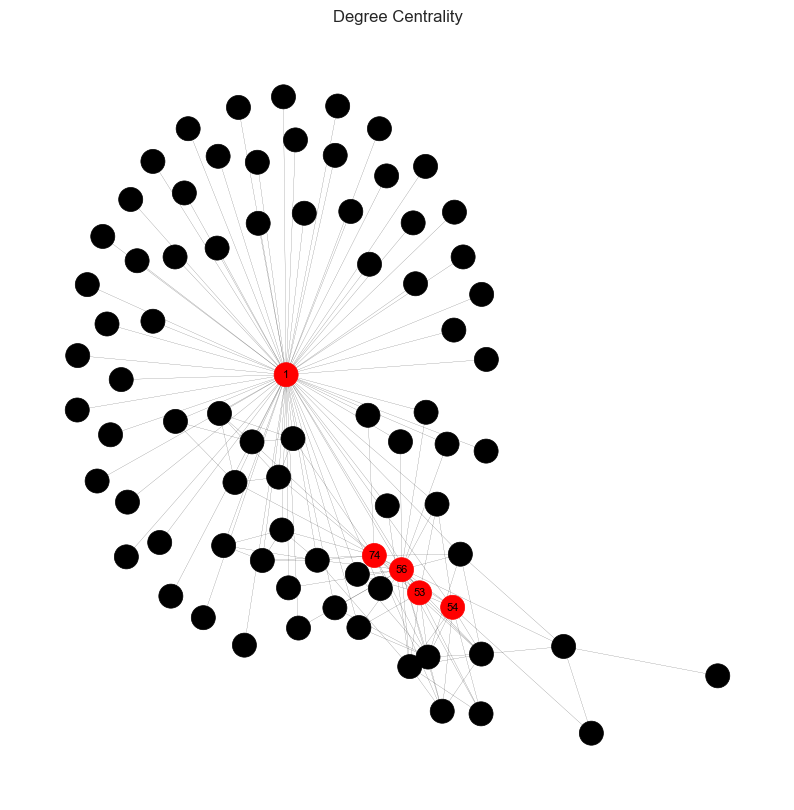

In [14]:
centrality_measure_details(deg_cen, 'Degree Centrality')

### **b. Eigenvector Centrality**

Sorted Importance of nodes in terms of Eigenvector Centrality:  [1, 56, 74, 53, 54]


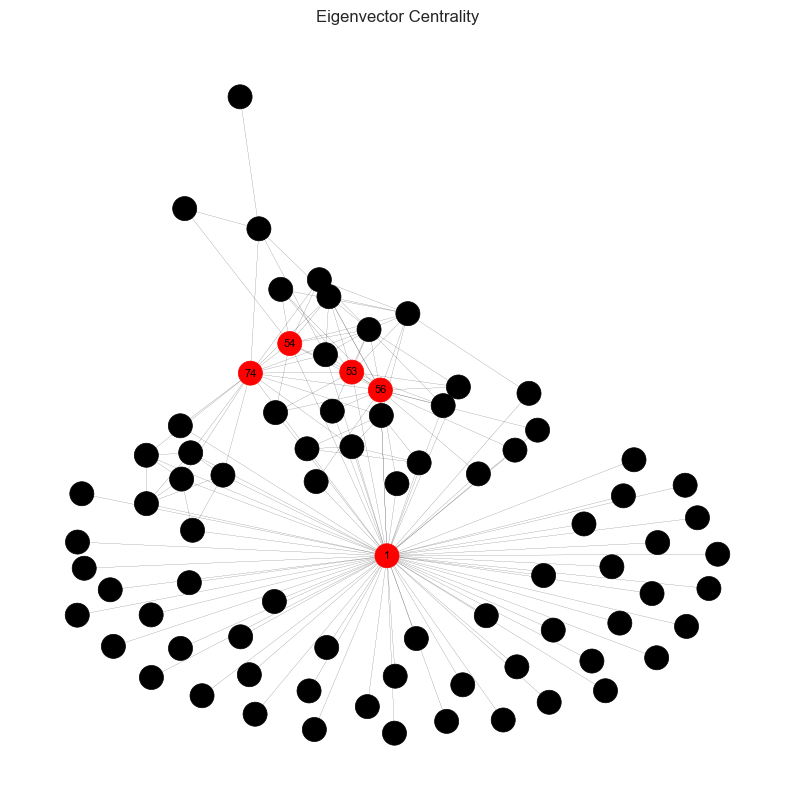

In [15]:
centrality_measure_details(eig_cen, 'Eigenvector Centrality')

### **c. Betweenness Centrality**

Sorted Importance of nodes in terms of Betweenness Centrality:  [1, 56, 54, 27, 74]


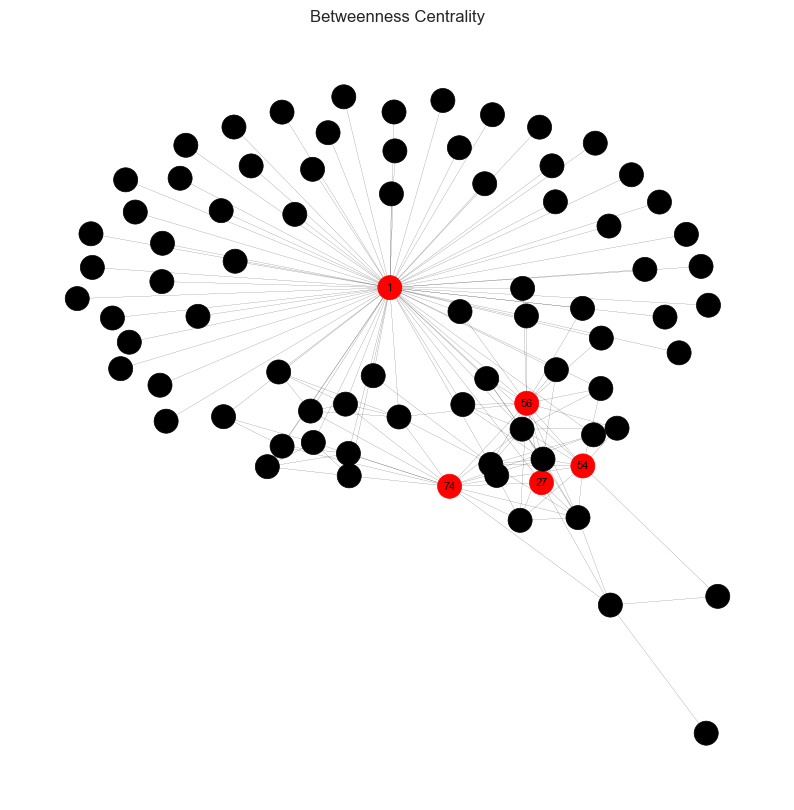

In [16]:
centrality_measure_details(bet_cen, 'Betweenness Centrality')

### **d. Closeness Centrality**

Sorted Importance of nodes in terms of Closeness Centrality:  [1, 56, 53, 54, 27]


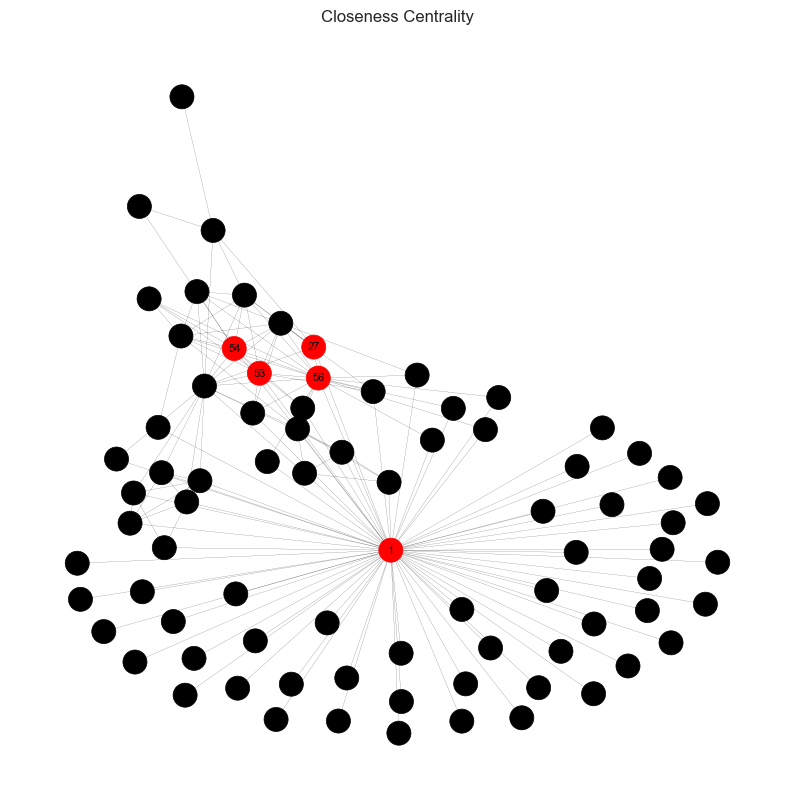

In [17]:
centrality_measure_details(clo_cen, 'Closeness Centrality')

## **Conclusion**

- We figured out the connections in the organization by visualizing the network.
- We also found various centrality measures and figured out the important nodes for each centrality measure. The importance of these nodes can be further explained by the definitions of the centralities they correspond to.
- We also identified the CEO node, i.e., Node 1. Nodes 56 and 54 are the other two nodes considered important by each centrality measure.
- We could figure out that there were internal team structures, but the connections were not very clear.

----------------